In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from category_encoders import TargetEncoder
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

## Data Description

The columns/variables in this dataset are:  
> **Y** = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers  
**X1** = my order was delivered on time   
**X2** = contents of my order was as I expected  
**X3** = I ordered everything I wanted to order  
**X4** = I paid a good price for my order   
**X5** = I am satisfied with my courier  
**X6** = the app makes ordering easy for me   

In [36]:
df = pd.read_csv('./ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [37]:
## checking to see if there are any null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [38]:
df.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


In [39]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


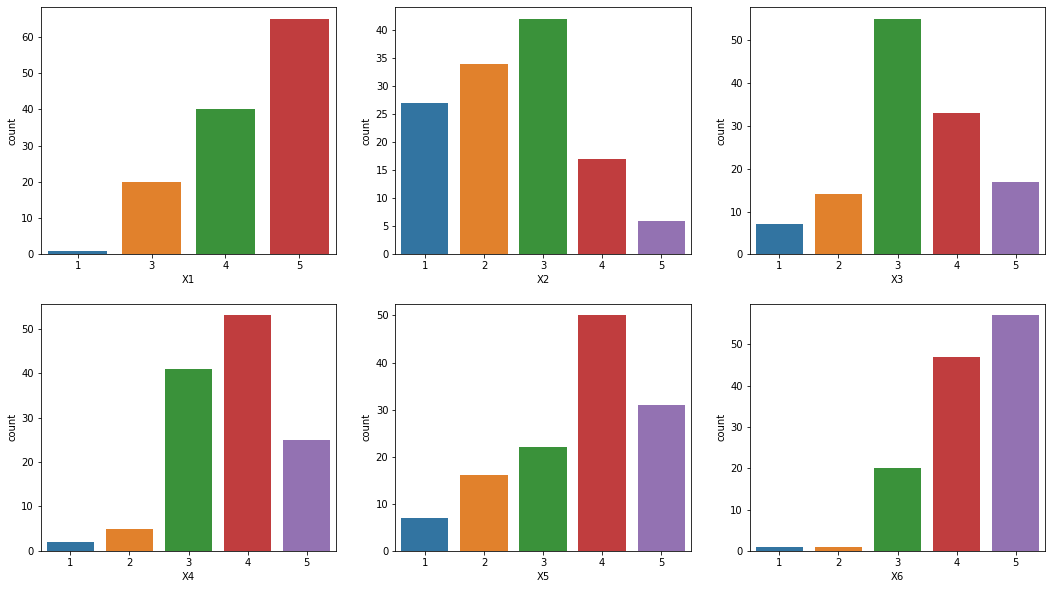

In [58]:
plt.figure(figsize=(18, 10))
for x in range(6):
    plt.subplot(2, 3, x+1)
    sns.countplot(df[df.columns[1:][x]])

In [171]:
X = df.drop(labels=['Y'], axis=1)
y = df['Y']

In [172]:
## checking customer happiness percentage
df['Y'].value_counts(normalize=True)

1    0.547619
0    0.452381
Name: Y, dtype: float64

55% percent happiness amongst customers suggests there is room for improvement for the food delivery service. Since our features are categorical variables, we'll use dummies and target encoding on our data.

# Target Encoding

In [173]:
## use target encoding on features

encoder = TargetEncoder(cols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6']).fit(X, y)
X_encoded = encoder.transform(X)

In [174]:
X_encoded

,X1,X2,X3,X4,X5,X6
0,0.400000,0.547619,0.472727,0.566038,0.437500,0.574468
1,0.400000,0.617647,0.472727,0.600000,0.560000,0.300000
2,0.692308,0.547619,0.472727,0.512195,0.454545,0.614035
3,0.692308,0.411765,0.472727,0.512195,0.454545,0.614035
4,0.692308,0.411765,0.472727,0.512195,0.454545,0.614035
...,...,...,...,...,...,...
121,0.692308,0.617647,0.472727,0.566038,0.560000,0.300000
122,0.692308,0.617647,0.472727,0.566038,0.437500,0.614035
123,0.692308,0.547619,0.472727,0.566038,0.560000,0.614035
124,0.400000,0.547619,0.472727,0.566038,0.560000,0.614035


# One Hot Encoding (Get Dummies)

In [175]:
## create dummies for all variables

x1_dummies = pd.get_dummies(X['X1'], prefix='X1', drop_first=True)
x2_dummies = pd.get_dummies(X['X2'], prefix='X2', drop_first=True)
x3_dummies = pd.get_dummies(X['X3'], prefix='X3', drop_first=True)
x4_dummies = pd.get_dummies(X['X4'], prefix='X4', drop_first=True)
x5_dummies = pd.get_dummies(X['X5'], prefix='X5', drop_first=True)
x6_dummies = pd.get_dummies(X['X6'], prefix='X6', drop_first=True)

X_dummies = pd.concat([x1_dummies, x2_dummies, x3_dummies, x4_dummies, x5_dummies, x6_dummies], axis=1)
X_dummies.head()

,X1_3,X1_4,X1_5,X2_2,X2_3,X2_4,X2_5,X3_2,X3_3,X3_4,...,X4_4,X4_5,X5_2,X5_3,X5_4,X5_5,X6_2,X6_3,X6_4,X6_5
0,1,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


# Modeling

Now that we have split our data into separate datasets containing our data without encoding, with target encoding, and with dummies, lets run them all through a simple logistic regression model.

## Basic Dataset

In [176]:
## split data into training and test sets, using 70% of the data for training and 30% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=27)

In [177]:
## run all features through a logistic regression model
## use gridsearch to find the optimal hyperparameters
logreg = LogisticRegression(solver='liblinear')
logistic_grid = [{'C': [1, 50, 2000, 1e15],
                  'penalty': ['l1', 'l2']}]

baseline_gridsearch = GridSearchCV(estimator=logreg,
                                   param_grid=logistic_grid,
                                   scoring='accuracy',
                                   cv=5)

baseline_gridsearch.fit(X_train, y_train)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 50, 2000, 1000000000000000.0],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [178]:
y_hat_train = baseline_gridsearch.predict(X_train)
y_hat_test = baseline_gridsearch.predict(X_test)

In [179]:
#find out accuracy score of baseline model

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Accuracy:  0.6049382716049383
Testing Accuracy:  0.5555555555555556


Pretty low accuracy score at 60% for training data and 56% for the testing data. Lets see if our transformed data performs better.

Accuracy after removing X3 and X4: training 68%, testing 58%

## Target Encoding Data

### Logistic Regression

In [180]:
## split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.35, random_state=27)

## run all features through a logistic regression model
## create grid parameter for logistic regression
logreg = LogisticRegression(solver='liblinear')
logistic_grid = [{'C': [1, 50, 2000, 1e15],
                  'penalty': ['l1', 'l2']}]

te_log_gridsearch = GridSearchCV(estimator=logreg,
                                   param_grid=logistic_grid,
                                   scoring='accuracy',
                                   cv=5)

te_log_gridsearch.fit(X_train, y_train)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 50, 2000, 1000000000000000.0],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [181]:
## find out accuracy score

y_hat_train = te_log_gridsearch.predict(X_train)
y_hat_test = te_log_gridsearch.predict(X_test)

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Accuracy:  0.7160493827160493
Testing Accuracy:  0.6222222222222222


By using target encoding we are able to increase our training accuracy score to 72% and our testing accuracy score to 62%.

After removing X3 and X4, training: 70%, testing: 62%

### SVM

In [204]:
## split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.35, random_state=27)

## run all features through a svm model
## create grid parameter for svm
clf = svm.SVC(kernel='linear')
svm_grid = [{'C': [0.1, 1, 10, 100],
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

svm_gridsearch = GridSearchCV(estimator=clf,
                                   param_grid=svm_grid,
                                   scoring='accuracy',
                                   cv=5)

svm_gridsearch.fit(X_train, y_train)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [205]:
## find out accuracy score

y_hat_train = svm_gridsearch.predict(X_train)
y_hat_test = svm_gridsearch.predict(X_test)

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Accuracy:  0.6666666666666666
Testing Accuracy:  0.5333333333333333


### Random Forest

In [182]:
## create grid parameter for random forest

rf = RandomForestClassifier()
rf_grid = [{'criterion': ['gini', 'entropy'],
            'n_estimators': [10, 30, 100],
            'max_depth': [None, 2, 5, 9, 15],
            'max_features': [None, 'auto'],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 4, 9]}]

rf_te_gridsearch = GridSearchCV(estimator=rf, 
                             param_grid=rf_grid,
                             scoring='accuracy',
                             cv=5)

rf_te_gridsearch.fit(X_train, y_train)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [183]:
## find out accuracy score

y_hat_train = rf_te_gridsearch.predict(X_train)
y_hat_test = rf_te_gridsearch.predict(X_test)

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Accuracy:  0.7037037037037037
Testing Accuracy:  0.6666666666666666


Using a random forest model, the accuracy score on the training data decreases to 70%, however the accuracy on the testing data increases to 67%. The models perform similarly.

After removing X3 and X4, training: 65%, testing: 62%

In [184]:
## define a function to plot imporant features

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [185]:
rf_te_gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [186]:
## create a RandomForest Classifier with optimal values to plot important features

optimal_rf = RandomForestClassifier(criterion='gini', 
                                    max_depth=2, 
                                    max_features='auto', 
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    n_estimators=10)

optimal_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [187]:
## find out accuracy score

y_hat_train = optimal_rf.predict(X_train)
y_hat_test = optimal_rf.predict(X_test)

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Accuracy:  0.6790123456790124
Testing Accuracy:  0.6444444444444445


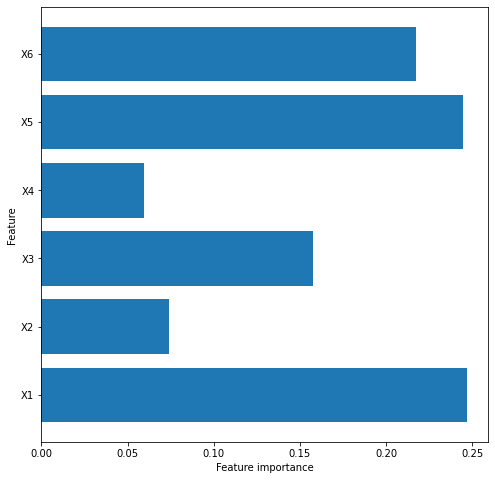

In [188]:
plot_feature_importances(optimal_rf)

The least important features for predicting a customers happiness are features X4 and X3. I'll remove both and see how my model improves.

## One Hot Encoding Data (Dummies)

### Logistic Regression

In [189]:
## split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.35, random_state=27)

logreg = LogisticRegression(solver='liblinear')
logistic_grid = [{'C': [1, 50, 2000, 1e15],
                  'penalty': ['l1', 'l2']}]

ohe_log_gridsearch = GridSearchCV(estimator=logreg,
                                   param_grid=logistic_grid,
                                   scoring='accuracy',
                                   cv=5)

ohe_log_gridsearch.fit(X_train, y_train)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 50, 2000, 1000000000000000.0],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [190]:
## find out accuracy score

y_hat_train = ohe_log_gridsearch.predict(X_train)
y_hat_test = ohe_log_gridsearch.predict(X_test)

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Accuracy:  0.7037037037037037
Testing Accuracy:  0.5555555555555556


Using one hot encoding, we are able to increase our training accuracy to 70% but our testing accuracy falls to 56%.

After removing X3 and X4, training 72%, testing 51%

### SVM

In [ ]:
## split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.35, random_state=27)

## run all features through a svm model
## create grid parameter for svm
clf = svm.SVC(kernel='linear')
svm_grid = [{'C': [0.1, 1, 10, 100],
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

svm_gridsearch = GridSearchCV(estimator=clf,
                                   param_grid=svm_grid,
                                   scoring='accuracy',
                                   cv=5)

svm_gridsearch.fit(X_train, y_train)

In [ ]:
## find out accuracy score

y_hat_train = svm_gridsearch.predict(X_train)
y_hat_test = svm_gridsearch.predict(X_test)

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

### Random Forest

In [191]:
## create grid parameter for random forest

rf = RandomForestClassifier()
rf_grid = [{'criterion': ['gini', 'entropy'],
            'n_estimators': [10, 30, 100],
            'max_depth': [None, 2, 5, 9, 15],
            'max_features': [None, 'auto'],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 4, 9]}]

rf_ohe_gridsearch = GridSearchCV(estimator=rf, 
                             param_grid=rf_grid,
                             scoring='accuracy',
                             cv=5)

rf_ohe_gridsearch.fit(X_train, y_train)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [192]:
## find out accuracy score

y_hat_train = rf_ohe_gridsearch.predict(X_train)
y_hat_test = rf_ohe_gridsearch.predict(X_test)

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Accuracy:  0.9753086419753086
Testing Accuracy:  0.5555555555555556


Using a random forest model, the accuracy score on the training data increases to 97%, however the accuracy on the testing data stays at 56%. Seems like the random forest model is overfitting to our data.

After removing X3 and X4, training 74%, testing 62%

In [193]:
rf_te_gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [194]:
## create a RandomForest Classifier with optimal values to plot important features

optimal_rf = RandomForestClassifier(criterion='gini', 
                                    max_depth=2, 
                                    max_features='auto', 
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    n_estimators=10)

optimal_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [195]:
## find out accuracy score

y_hat_train = optimal_rf.predict(X_train)
y_hat_test = optimal_rf.predict(X_test)

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Accuracy:  0.6172839506172839
Testing Accuracy:  0.5111111111111111


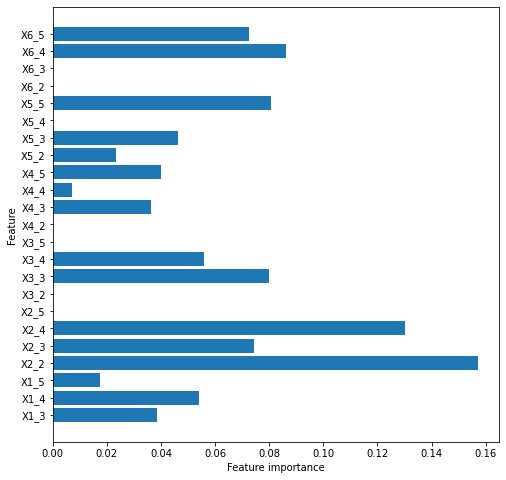

In [196]:
plot_feature_importances(optimal_rf)